# Image pre-processing 4
Combined whole image blurring and partial blurring (by chance)


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
import random
from collections import Counter
random.seed(21)
%matplotlib inline

In [2]:
IMAGE_FOLDER = '../../MR4/'
OUTPUT_FOLDER = '../../processed_multiblur_400p/'
# BLUR_SIZE = 9
OUTPUT_DIM = 400

In [3]:
cv.__version__

'3.4.2'

In [4]:
# Load files from input folder
dir_content = glob.glob(IMAGE_FOLDER+'*.jpg')
input_filenames = [x.split('/')[-1] for x in dir_content]
random.shuffle(input_filenames)

# Create blurring functions

## Partial blur

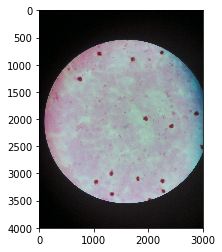

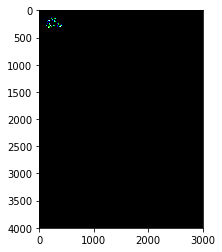

In [5]:
def partial_rectangular_blur(img_orig):
    allowed_horizontal = [0,350]
    allowed_vertical = [75,300]
    
#     print(allowed_horizontal)
#     print(allowed_vertical)
    
    num_blurs = random.randint(4,6)

    img = img_orig.copy().astype(np.uint8)
    masks = []
    
    for i in range(num_blurs):
        d = random.choice(list(range(51,100,2))) # +d is the width/height from the starting x/y
        blur_size = random.choice([5,7,9]) # how much blur should be applied
        
        y = random.randint(allowed_horizontal[0],allowed_horizontal[1])
        x = random.randint(allowed_vertical[0],allowed_vertical[1])

        
        selection = img[ x:x+d, y:y+d ,:]
#         selection[ selection[:,:,0] > 0 ] = 255
        selection = cv.blur(selection, (blur_size, blur_size))

        img[x:x+d, y:y+d ,:] = selection
        
    return img

test_img = cv.imread(IMAGE_FOLDER+input_filenames[1])
test_blur = partial_rectangular_blur(test_img)
plt.imshow(test_blur)
plt.show()
plt.imshow(test_img-test_blur)

## Full blur

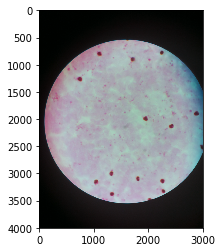

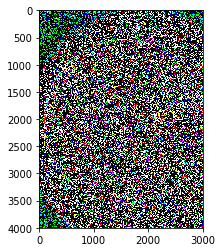

In [6]:
def whole_blur(orig_img):
    blur_range = [5,7,9]
    
    img = orig_img.copy()
    
    blur_size = random.choice(blur_range)    
    img = cv.blur(img, (blur_size, blur_size))

    return img

test_img = cv.imread(IMAGE_FOLDER+input_filenames[1])
test_blur = whole_blur(test_img)
plt.imshow(test_blur)
plt.show()
plt.imshow(test_img-test_blur)

# Cycle through images and apply blur

In [7]:
# %%time
# Perform reading, resizing, blurring, saving

counter = 0
num_files = len(input_filenames)

step = math.floor(0.1*num_files)
used_blurs = []

for file in input_filenames:
    
    # Create an empty black output image
    blur_out_img = np.zeros((OUTPUT_DIM, OUTPUT_DIM,3)).astype(np.uint8)
    orig_out_img = np.zeros((OUTPUT_DIM, OUTPUT_DIM,3)).astype(np.uint8)
    
    # Read the raw image into memory
    raw_img = cv.imread(IMAGE_FOLDER+file)
    
    # Scale the original image to fit in the output format
    scale = OUTPUT_DIM/max(raw_img.shape[0],raw_img.shape[1])
    img = cv.resize(raw_img, (0,0), fx=scale, fy=scale).astype(np.uint8)
        
#     print(file)
#     plt.imshow(img)
#     plt.show()
    
    # Select blur (by dynamically assigning the function)
    blur_func = None
    if counter % 2 == 0:
        blur_func = whole_blur
    else:
        blur_func = partial_rectangular_blur
    
    # Apply blur
    blurred_img = blur_func(img)
    
#     plt.imshow(blur_out_img)
#     plt.show()
#     plt.imshow(orig_out_img)
#     plt.show()
    
    # Fit the scaled blurred image into the empty black image (as zero padding)
    blur_out_img[ :blurred_img.shape[0], :blurred_img.shape[1] ] = blurred_img
    orig_out_img[ :img.shape[0], :img.shape[1] ] = img
    
#     plt.imshow(blur_out_img)
#     plt.show()
#     plt.imshow(orig_out_img)
#     plt.show()
    
    cv.imwrite(OUTPUT_FOLDER+'blur/'+file, blur_out_img)
    cv.imwrite(OUTPUT_FOLDER+'orig/'+file, orig_out_img)
    
    if counter % step == 0:
        percentage = round( counter / num_files,1 )
        print( '{} done'.format(percentage) )
    
    counter += 1

# plt.imshow(blur_out_img)
        
print('done.')

0.0 done
0.1 done
0.2 done
0.3 done
0.4 done
0.5 done
0.6 done
0.7 done
0.8 done
0.9 done
1.0 done
done.
